# Instacart Grocery Basket Analysis (Part 1: Customer Profling)

### Contents:
    
1.Importing libraries and files

2.Customer profiling and visualizations

3.Exporting dataframes and charts

#### 1.Importing libraries and files

In [259]:
#importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy


In [2]:
#importing data
path = r'/Users/tiaoshrieh/Desktop/IC Project'

In [3]:
all_merged = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_customers.pkl'))

In [4]:
deps_df = pd.read_csv(os.path.join(path, '02 Data','Prepared Data', 'departments_wrangled.csv'))

#### 2.Customer profiling and visualizations

##### 2.1 Classifying customers based on age

In [10]:
#Creating age flag
all_merged.loc[(all_merged['age'] >= 18) & (all_merged['age'] < 40), 'age_category'] = 'Young'
all_merged.loc[(all_merged['age'] >= 40) & (all_merged['age'] < 60), 'age_category'] = 'Middle age'
all_merged.loc[(all_merged['age'] >= 60) , 'age_category'] = 'Senior'

In [13]:
all_merged.shape

(32404859, 34)

In [14]:
value_counts = all_merged['age_category'].value_counts(normalize=True) * 100

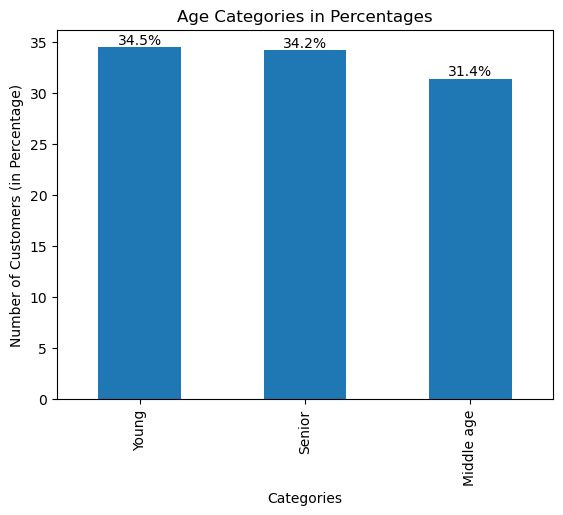

In [15]:
#bar chart for distribution of customers by age
bar_age =value_counts.plot.bar()
plt.xlabel('Categories')
plt.ylabel('Number of Customers (in Percentage)')
plt.title('Age Categories in Percentages')
for i, v in enumerate(value_counts.values):
    plt.text(i, v, f'{v:.1f}%', ha='center', va='bottom')



##### 2.1.a Connection of age and family status in ordering habits

In [279]:
#Creating a column connecting family status and age
all_merged.loc[(all_merged['age_category'] == 'Young') & (all_merged['family_status'] == 'single'), 'age_family_profile'] = 'Young single'

In [280]:
all_merged.loc[(all_merged['age_category'] == 'Middle age') & (all_merged['family_status'] == 'single'), 'age_family_profile'] = 'Middle age single'

In [281]:
all_merged.loc[(all_merged['age_category'] == 'Senior') & (all_merged['family_status'] == 'single'), 'age_family_profile'] = 'Senior single'

In [282]:
all_merged.loc[(all_merged['age_category'] == 'Young') & (all_merged['family_status'] == 'married'), 'age_family_profile'] = 'Young married'

In [283]:
all_merged.loc[(all_merged['age_category'] == 'Middle age') & (all_merged['family_status'] == 'married'), 'age_family_profile'] = 'Middle age married'

In [284]:
all_merged.loc[(all_merged['age_category'] == 'Senior') & (all_merged['family_status'] == 'married'), 'age_family_profile'] = 'Senior married'

In [285]:
all_merged.loc[(all_merged['age_category'] == 'Young') & (all_merged['family_status'] == 'divorced/widowed'), 'age_family_profile'] = 'Young divorced/widowed'

In [286]:
all_merged.loc[(all_merged['age_category'] == 'Middle age') & (all_merged['family_status'] == 'divorced/widowed'), 'age_family_profile'] = 'Middle age divorced/widowed'

In [287]:
all_merged.loc[(all_merged['age_category'] == 'Senior') & (all_merged['family_status'] == 'divorced/widowed'), 'age_family_profile'] = 'Senior divorced/widowed'

In [288]:
all_merged.loc[(all_merged['age_category'] == 'Young') & (all_merged['family_status'] == 'living with parents and siblings'), 'age_family_profile'] = 'Young living with parents/siblings'

In [289]:
all_merged.loc[(all_merged['age_category'] == 'Middle age') & (all_merged['family_status'] == 'living with parents and siblings'), 'age_family_profile'] = 'Middle age living with parents/siblings'

In [290]:
all_merged.loc[(all_merged['age_category'] == 'Senior') & (all_merged['family_status'] == 'living with parents and siblings'), 'age_family_profile'] = 'Senior living with parents/siblings'

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Senior married'),
  Text(1, 0, 'Middle age married'),
  Text(2, 0, 'Young married'),
  Text(3, 0, 'Young single'),
  Text(4, 0, 'Senior divorced/widowed'),
  Text(5, 0, 'Middle age single'),
  Text(6, 0, 'Young living with parents/siblings')])

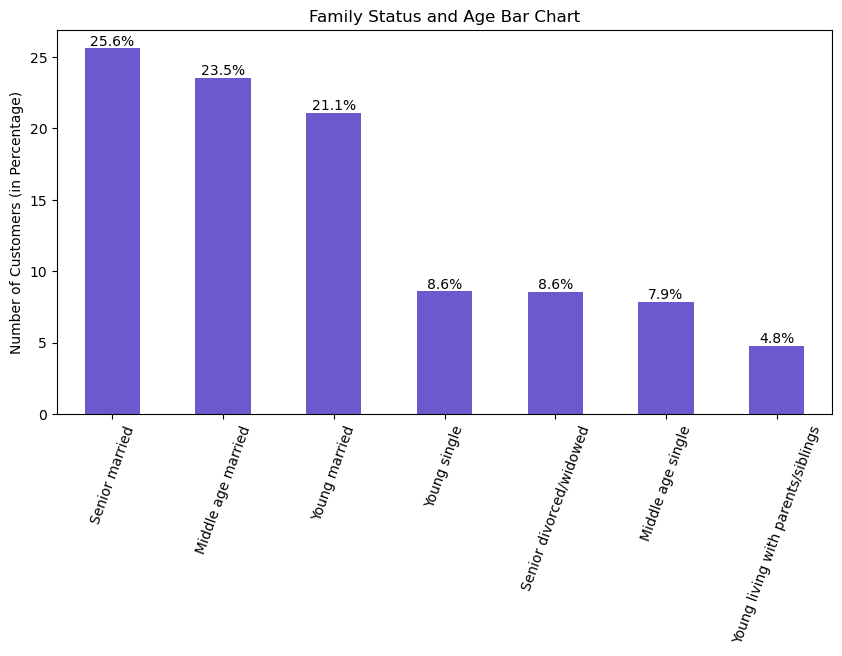

In [291]:
#bar chart for distribution of customers by age and family status
value_counts5 = all_merged['age_family_profile'].value_counts(normalize=True) * 100
plt.subplots_adjust(bottom=0.4)
age_family_bar = value_counts5.plot.bar(figsize=(10, 8) , color = 'slateblue')
for i, v in enumerate(value_counts5.values):
    plt.text(i, v, f'{v:.1f}%', ha='center', va='bottom')
plt.ylabel('Number of Customers (in Percentage)')
plt.title('Family Status and Age Bar Chart')
plt.xticks(rotation=70)

In [293]:
#crosstab to find the popularity of products among age and family status categories
age_family_product = pd.crosstab(all_merged['age_family_profile'], all_merged['department_id'])

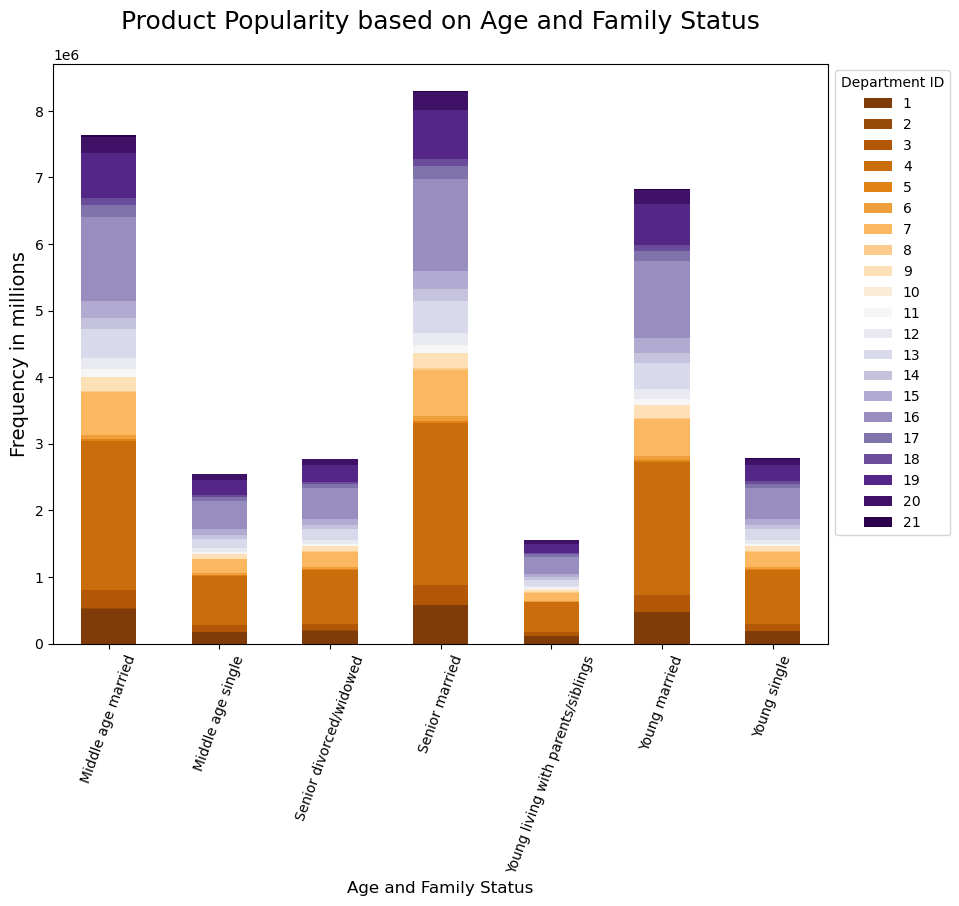

In [299]:
age_family_product_bar = age_family_product.plot.bar(figsize=(10, 10), stacked = True, colormap = 'PuOr')
plt.subplots_adjust(bottom=0.3)
plt.title('Product Popularity based on Age and Family Status', fontsize=18, pad=25)
plt.xlabel('Age and Family Status', fontsize=12)
plt.ylabel('Frequency in millions', fontsize=14)
plt.xticks(rotation=70)
plt.legend(title='Department ID', bbox_to_anchor=(1.0, 1.0), loc='upper left')

##### 2.2 Classifying customers based on income

In [17]:
all_merged['income'].describe()

count    3.240486e+07
mean     9.943773e+04
std      4.305727e+04
min      2.590300e+04
25%      6.700400e+04
50%      9.661800e+04
75%      1.279120e+05
max      5.939010e+05
Name: income, dtype: float64

In [18]:
#Creating income flag
all_merged.loc[all_merged['income'] < 60000, 'income_flag'] = 'Low'
all_merged.loc[(all_merged['income'] >= 60000) & (all_merged['income'] < 120000), 'income_flag'] = 'Average'
all_merged.loc[all_merged['income'] >= 120000, 'income_flag'] = 'High'

In [20]:
value_counts2 = all_merged['income_flag'].value_counts(normalize=True) * 100

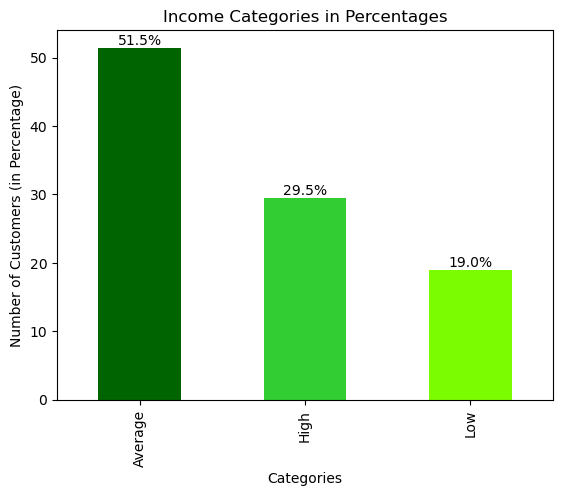

In [21]:
bar_age =value_counts2.plot.bar(color = ['darkgreen','limegreen', 'lawngreen'])
plt.xlabel('Categories')
plt.ylabel('Number of Customers (in Percentage)')
plt.title('Income Categories in Percentages')
for i, v in enumerate(value_counts2.values):
    plt.text(i, v, f'{v:.1f}%', ha='center', va='bottom')


Text(0.5, 0, 'Income')

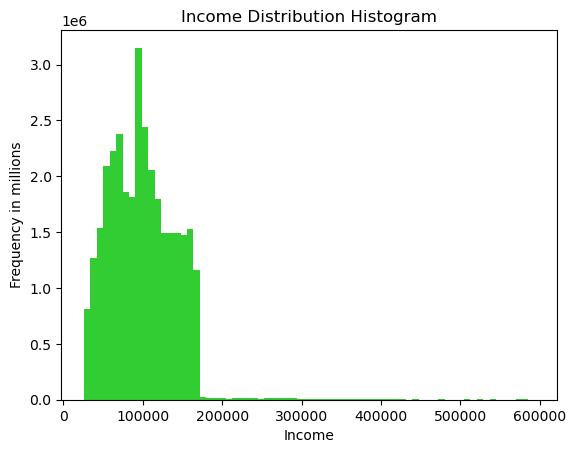

In [22]:
hist_income = all_merged['income'].plot.hist(bins = 70, color = 'limegreen')
plt.title('Income Distribution Histogram')
plt.ylabel('Frequency in millions')
plt.xlabel('Income')

In [23]:
#Creating a bar chart showing the distribution of income in different regions
income_region_cross = pd.crosstab(all_merged['income_flag'], all_merged['region'], dropna = False)

Text(0.5, 0, 'Income')

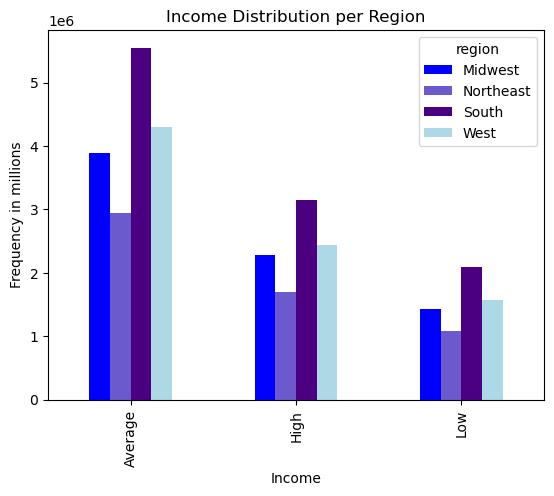

In [24]:
income_region_bar = income_region_cross.plot.bar(color = ['blue','slateblue', 'indigo', 'lightblue'])
plt.title('Income Distribution per Region')
plt.ylabel('Frequency in millions')
plt.xlabel('Income')


##### 2.3 Classifying customers based on family situation and income

In [262]:
#Creating a column combining family status and income
all_merged.loc[(all_merged['income_flag'] == 'High') & (all_merged['family_status'] == 'single'), 'family_income_profile'] = 'high_income single'

In [263]:
all_merged.loc[(all_merged['income_flag'] == 'High') & (all_merged['family_status'] == 'married'), 'family_income_profile'] = 'high_income married'

In [264]:
all_merged.loc[(all_merged['income_flag'] == 'High') & (all_merged['family_status'] == 'divorced/widowed'), 'family_income_profile'] = 'high_income divorced/widowed'

In [265]:
all_merged.loc[(all_merged['income_flag'] == 'High') & (all_merged['family_status'] == 'living with parents and siblings'), 'family_income_profile'] = 'high_income with parents/siblings'

In [266]:
all_merged.loc[(all_merged['income_flag'] == 'low') & (all_merged['family_status'] == 'single'), 'family_income_profile'] = 'low_income single'

In [267]:
all_merged.loc[(all_merged['income_flag'] == 'low') & (all_merged['family_status'] == 'married'), 'family_income_profile'] = 'low_income married'

In [268]:
all_merged.loc[(all_merged['income_flag'] == 'low') & (all_merged['family_status'] == 'divorced/widowed'), 'family_income_profile'] = 'low_income divorced/widowed'

In [269]:
all_merged.loc[(all_merged['income_flag'] == 'low') & (all_merged['family_status'] == 'living with parents and siblings'), 'family_income_profile'] = 'low_income with parents/siblings'

In [270]:
all_merged.loc[(all_merged['income_flag'] == 'Average') & (all_merged['family_status'] == 'single'), 'family_income_profile'] = 'average_income single'

In [271]:
all_merged.loc[(all_merged['income_flag'] == 'Average') & (all_merged['family_status'] == 'married'), 'family_income_profile'] = 'average_income married'

In [272]:
all_merged.loc[(all_merged['income_flag'] == 'Average') & (all_merged['family_status'] == 'divorced/widowed'), 'family_income_profile'] = 'average_income divorced/widowed'

In [273]:
all_merged.loc[(all_merged['income_flag'] == 'Average') & (all_merged['family_status'] == 'living with parents and siblings'), 'family_income_profile'] = 'average_income with parents/siblings'

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'average_income married'),
  Text(1, 0, 'high_income married'),
  Text(2, 0, 'average_income single'),
  Text(3, 0, 'high_income divorced/widowed'),
  Text(4, 0, 'average_income divorced/widowed'),
  Text(5, 0, 'high_income single'),
  Text(6, 0, 'average_income with parents/siblings'),
  Text(7, 0, 'high_income with parents/siblings')])

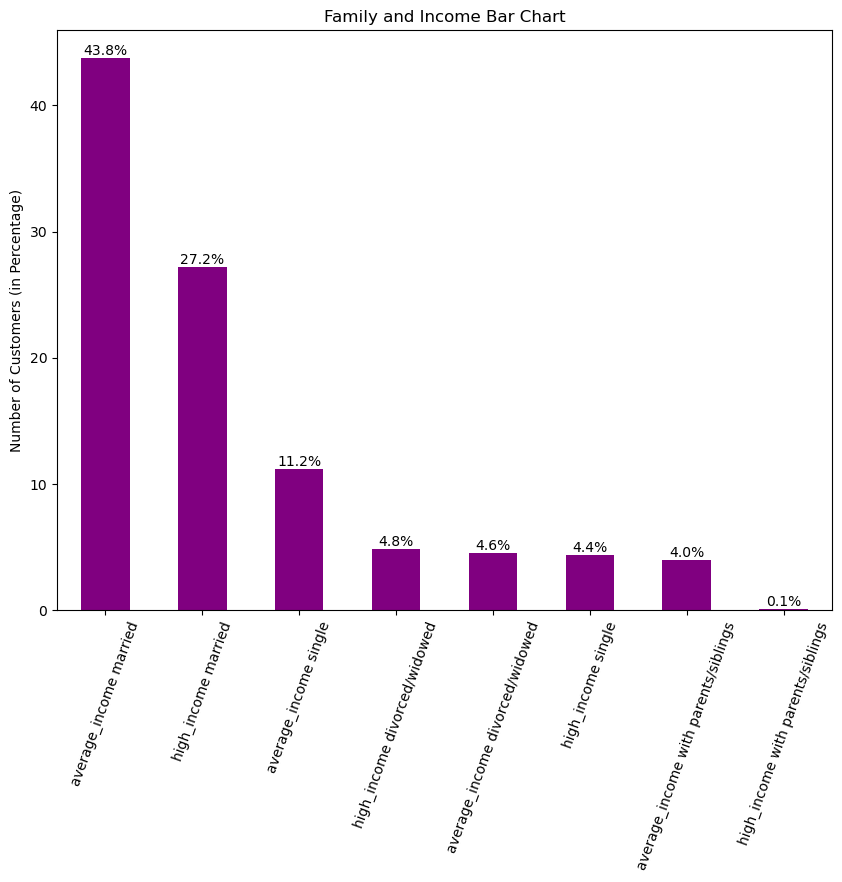

In [297]:
#Bar chart for family status and income
value_counts3 = all_merged['family_income_profile'].value_counts(normalize=True) * 100
family_income_bar = value_counts3.plot.bar(figsize = (10, 10), color = 'purple')
plt.subplots_adjust(bottom=0.3)
for i, v in enumerate(value_counts3.values):
    plt.text(i, v, f'{v:.1f}%', ha='center', va='bottom')
plt.ylabel('Number of Customers (in Percentage)')
plt.title('Family and Income Bar Chart')
plt.xticks(rotation=70)

##### 2.4 Ordering habits based on price and products (departments)

In [38]:
#Creating a chart to see the popularity of products
prods_popularity_cross = pd.crosstab(all_merged['department_id'],all_merged['price_range_loc'], dropna = False)
 

In [39]:
all_merged['department_id'].value_counts()

4     9479291
16    5398747
19    2887550
7     2688123
1     2234743
13    1875369
3     1172428
15    1068058
20    1051249
9      866627
17     738666
12     708927
14     703033
11     447572
18     423802
6      269253
5      153696
8       97716
21      69145
2       36291
10      34573
Name: department_id, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12'),
  Text(12, 0, '13'),
  Text(13, 0, '14'),
  Text(14, 0, '15'),
  Text(15, 0, '16'),
  Text(16, 0, '17'),
  Text(17, 0, '18'),
  Text(18, 0, '19'),
  Text(19, 0, '20'),
  Text(20, 0, '21')])

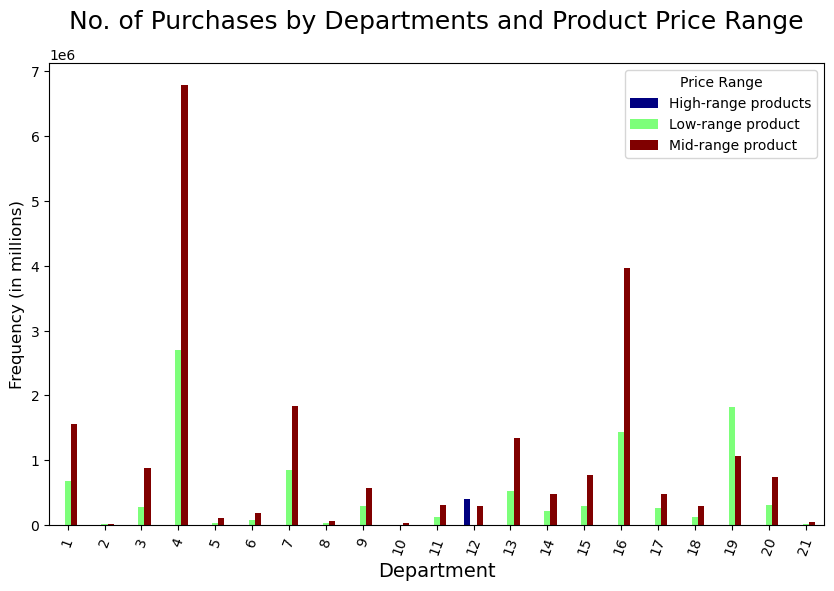

In [40]:
prods_popularity_cross_bar = prods_popularity_cross.plot(kind = 'bar', figsize=(10, 6), rot = 0, colormap='jet').legend(title="Price Range", bbox_to_anchor=(1.0,1.0))
plt.title('No. of Purchases by Departments and Product Price Range', fontsize = 18, pad=25)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Department',  fontsize = 14)
plt.xticks(rotation=70)

##### 2.5 Brand loyalty and ordering habits across regions

###### 2.5.a Classification and disitribution in different regions

Text(0.5, 1.0, 'Loyalty Flag Pie Chart')

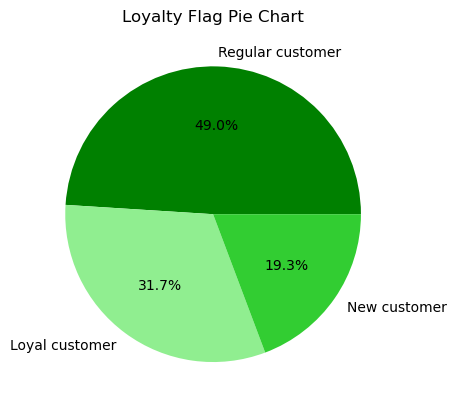

In [59]:
#Pie chart for distribution of customers based on loyalty
value_counts4 = all_merged['loyalty_flag'].value_counts(normalize=True) * 100
fig, ax = plt.subplots()
ax.pie(value_counts4, labels = ['Regular customer', 'Loyal customer', 'New customer'], colors = ['green', 'lightgreen', 'limegreen'],  autopct='%1.1f%%')
ax.set_title('Loyalty Flag Pie Chart')

In [ ]:
#crosstab for distribution of customers across regions based on brand loyalty
loyalty_region_cross = pd.crosstab(all_merged['loyalty_flag'], all_merged['region'], dropna = False)

(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

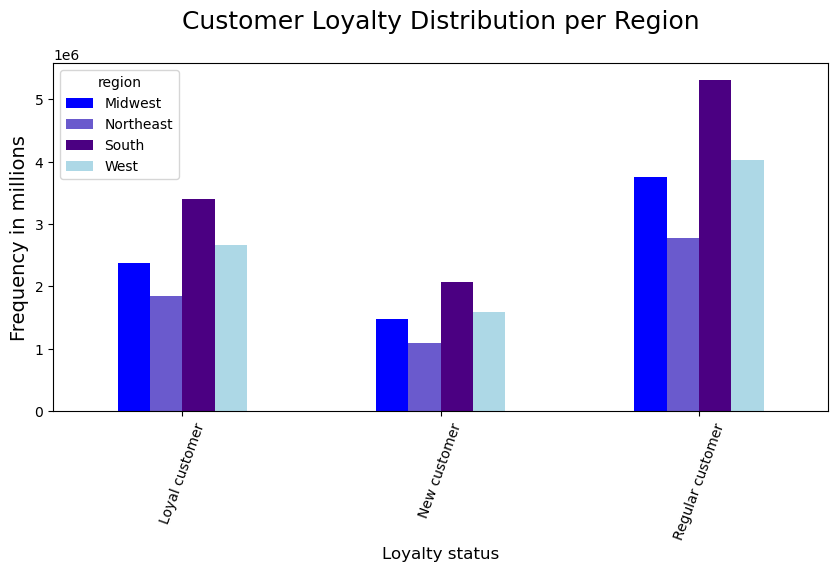

In [178]:
loyalty_region_bar = loyalty_region_cross.plot.bar(figsize=(10, 6), color = ['blue','slateblue', 'indigo', 'lightblue'])
plt.subplots_adjust(bottom=0.3)
plt.title('Customer Loyalty Distribution per Region', fontsize = 18, pad=25)
plt.ylabel('Frequency in millions',fontsize = 14 )
plt.xlabel('Loyalty status',fontsize = 12)
plt.xticks(rotation=70)

In [41]:
all_merged['loyalty_flag'].value_counts()

Regular customer    15876776
Loyal customer      10284093
New customer         6243990
Name: loyalty_flag, dtype: int64

###### 2.5.b Ordering habits among different categories of brand loyalty

In [179]:
#crosstab for popularity of products among loyal, new, and regular customers
loyalty_products_cross = pd.crosstab(all_merged['loyalty_flag'], all_merged['department_id'], dropna = False)

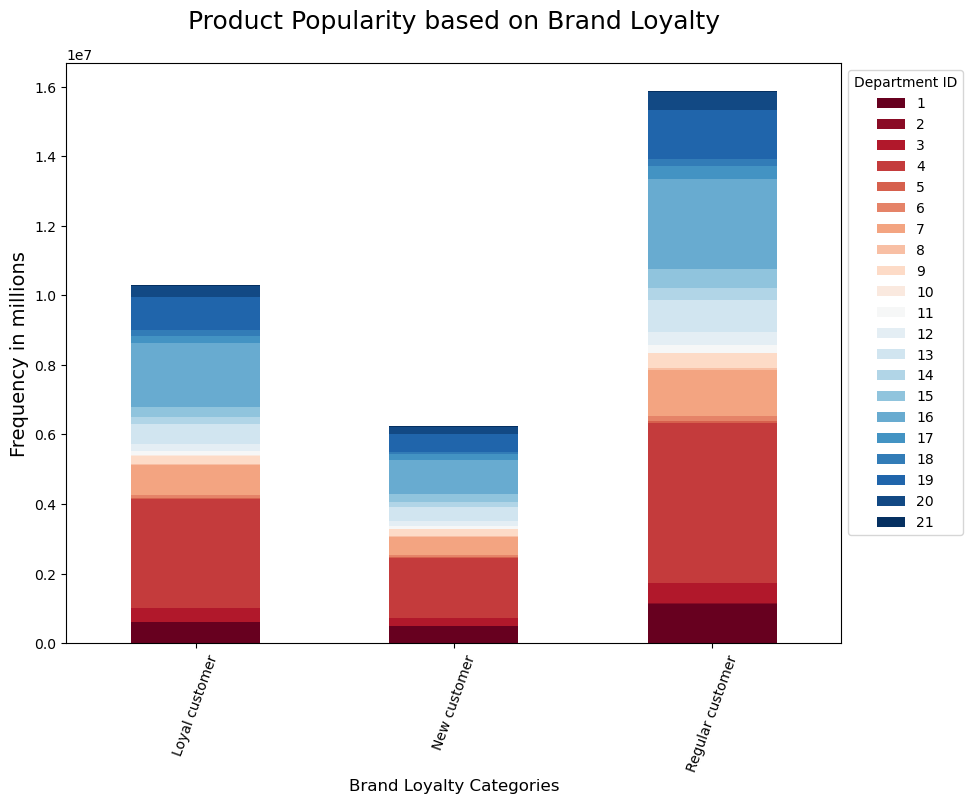

In [181]:
loyalty_products_bar = loyalty_products_cross.plot.bar(figsize=(10, 10), stacked = True, colormap = 'RdBu')
plt.subplots_adjust(bottom=0.3)
plt.title('Product Popularity based on Brand Loyalty', fontsize=18, pad=25)
plt.xlabel('Brand Loyalty Categories', fontsize=12)
plt.ylabel('Frequency in millions', fontsize=14)
plt.xticks(rotation=70)
plt.legend(title='Department ID', bbox_to_anchor=(1.0, 1.0), loc='upper left')

##### 2.6 Ordering habits based on region

In [187]:
#crosstab for products and regions
products_region_cross = pd.crosstab(all_merged['department_id'], all_merged['region'], dropna = False)

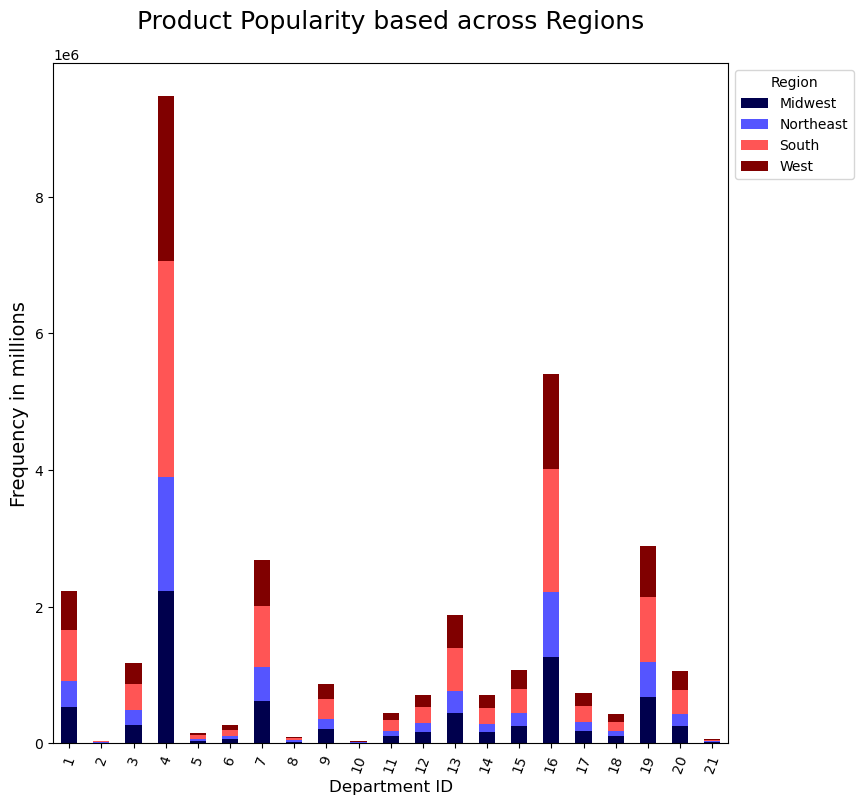

In [248]:
products_region_bar = products_region_cross.plot.bar(figsize=(10, 10), stacked = True, colormap = 'seismic')
plt.subplots_adjust(bottom=0.2, right = 0.8)
plt.title('Product Popularity based across Regions', fontsize=18, pad=25)
plt.xlabel('Department ID', fontsize=12)
plt.ylabel('Frequency in millions', fontsize=14)
plt.xticks(rotation=70)
plt.legend(title='Region', bbox_to_anchor=(1.0, 1.0), loc='upper left')

#### 3.Exporting dataframes and visualizations

In [ ]:
age_family_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_family_bar.png'))

In [ ]:
age_family_product_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'family_age_products.png'))

In [ ]:
family_income_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'family_income_bar.png'))

In [ ]:
prods_popularity_cross_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'prods_popularity_bar.png'))

In [ ]:
fig.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_pie.png'))

In [ ]:
loyalty_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_region.png'))

In [ ]:
loyalty_products_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_products_bar.png'))

In [ ]:
products_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'products_region_bar.png'))

In [ ]:
all_merged.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_customers.pkl'))